# Tricks of the trade TF/Keras [small dataset]

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras. It uses a small data set so that it can be trained on the CPU.

Below are several experiments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras 2.1.5 TF 1.6.0 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
(4000, 1, 28, 28) (4000,) 28


### Suggestions for the experiment

Let the experiments run for 100 epochs. You might need to restart the kernel so that namings of the layers are the same

* with init zero 
* with sigmoid activation 
* with ReLU activation
* with dropout (p=0.3)
* with batch-normalization and dropout

In [2]:
### First model with all zeros
name = 'sigmoid_init0'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784), kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(50,kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax',kernel_initializer='zero'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### Untrained model


In [3]:
-np.log(0.1)

2.3025850929940455

In [4]:
model.evaluate(X[0:2000], convertToOneHot(y[0:2000],10))

2000/2000 [==============================] - 0s 177us/step


[2.3025851249694824, 0.0955]

In [5]:
model.predict_classes(X[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 1s - loss: 2.3039 - acc: 0.0992 - val_loss: 2.2982 - val_acc: 0.1233
Epoch 2/50
 - 0s - loss: 2.3024 - acc: 0.1037 - val_loss: 2.2988 - val_acc: 0.1233
Epoch 3/50
 - 0s - loss: 2.3026 - acc: 0.1025 - val_loss: 2.2999 - val_acc: 0.1067
Epoch 4/50
 - 0s - loss: 2.3023 - acc: 0.1062 - val_loss: 2.2992 - val_acc: 0.1233
Epoch 5/50
 - 0s - loss: 2.3034 - acc: 0.1017 - val_loss: 2.2994 - val_acc: 0.1033
Epoch 6/50
 - 0s - loss: 2.3026 - acc: 0.1000 - val_loss: 2.2990 - val_acc: 0.1033
Epoch 7/50
 - 0s - loss: 2.3032 - acc: 0.1104 - val_loss: 2.3004 - val_acc: 0.1033
Epoch 8/50
 - 0s - loss: 2.3028 - acc: 0.1042 - val_loss: 2.2993 - val_acc: 0.1233
Epoch 9/50
 - 0s - loss: 2.3036 - acc: 0.1100 - val_loss: 2.2985 - val_acc: 0.1067
Epoch 10/50
 - 0s - loss: 2.3032 - acc: 0.1042 - val_loss: 2.2989 - val_acc: 0.1233
Epoch 11/50
 - 0s - loss: 2.3022 - acc: 0.1046 - val_loss: 2.2979 - val_acc: 0.1033
Epoch 12/50
 - 0s - loss: 2.3034 - acc

In [7]:
K.clear_session()
### Model with default initialization 
name = 'sigmoid'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [8]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 1s - loss: 1.9124 - acc: 0.4783 - val_loss: 1.5272 - val_acc: 0.7333
Epoch 2/50
 - 0s - loss: 1.3131 - acc: 0.7571 - val_loss: 1.1381 - val_acc: 0.7933
Epoch 3/50
 - 1s - loss: 1.0091 - acc: 0.8192 - val_loss: 0.9229 - val_acc: 0.8133
Epoch 4/50
 - 0s - loss: 0.8222 - acc: 0.8525 - val_loss: 0.7764 - val_acc: 0.8533
Epoch 5/50
 - 0s - loss: 0.6950 - acc: 0.8662 - val_loss: 0.6830 - val_acc: 0.8583
Epoch 6/50
 - 0s - loss: 0.6016 - acc: 0.8875 - val_loss: 0.6098 - val_acc: 0.8650
Epoch 7/50
 - 0s - loss: 0.5318 - acc: 0.8983 - val_loss: 0.5616 - val_acc: 0.8667
Epoch 8/50
 - 0s - loss: 0.4766 - acc: 0.9096 - val_loss: 0.5144 - val_acc: 0.8783
Epoch 9/50
 - 0s - loss: 0.4297 - acc: 0.9175 - val_loss: 0.4859 - val_acc: 0.8783
Epoch 10/50
 - 0s - loss: 0.3938 - acc: 0.9250 - val_loss: 0.4574 - val_acc: 0.8900
Epoch 11/50
 - 0s - loss: 0.3631 - acc: 0.9279 - val_loss: 0.4409 - val_acc: 0.8833
Epoch 12/50
 - 0s - loss: 0.3367 - acc

In [9]:
K.clear_session()
### Relu 
name = 'relu'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [10]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 1s - loss: 0.9199 - acc: 0.7350 - val_loss: 0.3953 - val_acc: 0.8933
Epoch 2/50
 - 0s - loss: 0.2308 - acc: 0.9417 - val_loss: 0.3334 - val_acc: 0.9100
Epoch 3/50
 - 0s - loss: 0.1200 - acc: 0.9771 - val_loss: 0.3127 - val_acc: 0.9133
Epoch 4/50
 - 0s - loss: 0.0692 - acc: 0.9896 - val_loss: 0.3017 - val_acc: 0.9183
Epoch 5/50
 - 0s - loss: 0.0428 - acc: 0.9962 - val_loss: 0.3028 - val_acc: 0.9117
Epoch 6/50
 - 0s - loss: 0.0275 - acc: 0.9988 - val_loss: 0.2995 - val_acc: 0.9167
Epoch 7/50
 - 0s - loss: 0.0189 - acc: 0.9992 - val_loss: 0.2940 - val_acc: 0.9200
Epoch 8/50
 - 0s - loss: 0.0128 - acc: 1.0000 - val_loss: 0.2873 - val_acc: 0.9233
Epoch 9/50
 - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.9233
Epoch 10/50
 - 0s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.2981 - val_acc: 0.9233
Epoch 11/50
 - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.2950 - val_acc: 0.9233
Epoch 12/50
 - 0s - loss: 0.0042 - acc

In [11]:
K.clear_session()
### Dropout
name = 'dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [12]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 1s - loss: 1.2834 - acc: 0.6075 - val_loss: 0.5030 - val_acc: 0.8583
Epoch 2/50
 - 0s - loss: 0.5263 - acc: 0.8488 - val_loss: 0.3884 - val_acc: 0.8833
Epoch 3/50
 - 0s - loss: 0.3632 - acc: 0.8933 - val_loss: 0.3454 - val_acc: 0.9033
Epoch 4/50
 - 0s - loss: 0.2849 - acc: 0.9096 - val_loss: 0.3254 - val_acc: 0.9100
Epoch 5/50
 - 0s - loss: 0.2253 - acc: 0.9329 - val_loss: 0.3077 - val_acc: 0.9167
Epoch 6/50
 - 0s - loss: 0.1982 - acc: 0.9371 - val_loss: 0.3154 - val_acc: 0.9133
Epoch 7/50
 - 0s - loss: 0.1654 - acc: 0.9496 - val_loss: 0.3345 - val_acc: 0.9183
Epoch 8/50
 - 0s - loss: 0.1312 - acc: 0.9633 - val_loss: 0.3149 - val_acc: 0.9133
Epoch 9/50
 - 0s - loss: 0.1235 - acc: 0.9604 - val_loss: 0.3321 - val_acc: 0.9133
Epoch 10/50
 - 0s - loss: 0.1144 - acc: 0.9671 - val_loss: 0.3250 - val_acc: 0.9133
Epoch 11/50
 - 0s - loss: 0.0876 - acc: 0.9721 - val_loss: 0.3322 - val_acc: 0.9167
Epoch 12/50
 - 0s - loss: 0.0785 - acc

In [13]:
K.clear_session()
### Batchnorm
name = 'batch_dropout'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [14]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 2s - loss: 1.3832 - acc: 0.5817 - val_loss: 0.6413 - val_acc: 0.8500
Epoch 2/50
 - 1s - loss: 0.7103 - acc: 0.8417 - val_loss: 0.5016 - val_acc: 0.8650
Epoch 3/50
 - 1s - loss: 0.5425 - acc: 0.8821 - val_loss: 0.4245 - val_acc: 0.8867
Epoch 4/50
 - 1s - loss: 0.4327 - acc: 0.9071 - val_loss: 0.3731 - val_acc: 0.9000
Epoch 5/50
 - 1s - loss: 0.3772 - acc: 0.9221 - val_loss: 0.3568 - val_acc: 0.9033
Epoch 6/50
 - 1s - loss: 0.3252 - acc: 0.9304 - val_loss: 0.3385 - val_acc: 0.9050
Epoch 7/50
 - 1s - loss: 0.2674 - acc: 0.9517 - val_loss: 0.3227 - val_acc: 0.9100
Epoch 8/50
 - 1s - loss: 0.2280 - acc: 0.9563 - val_loss: 0.3077 - val_acc: 0.9183
Epoch 9/50
 - 1s - loss: 0.2033 - acc: 0.9613 - val_loss: 0.3085 - val_acc: 0.9117
Epoch 10/50
 - 1s - loss: 0.1905 - acc: 0.9604 - val_loss: 0.3031 - val_acc: 0.9133
Epoch 11/50
 - 1s - loss: 0.1649 - acc: 0.9675 - val_loss: 0.3027 - val_acc: 0.9183
Epoch 12/50
 - 1s - loss: 0.1407 - acc

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

## Training

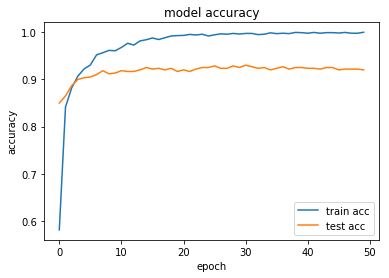

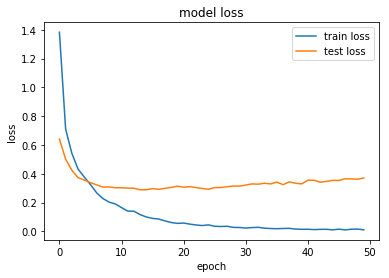

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [17]:
!tensorboard --logdir=tensorboard/mnist_small/

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
TensorBoard 1.6.0 at http://ec0d536a39b9:6006 (Press CTRL+C to quit)
^C
